__OVERFITTING__: Basically, overfitting means that the model has memorized the training data and can’t generalize to things it hasn’t seen. 

In [24]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from math import radians, cos, sin, sqrt, asin

In [25]:
df = pd.read_csv('TaxiFare.csv')

In [26]:
df.sample(n=10)

# utc is (cordinated universal time) in date_time_of_pickup

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
16454,50:15.0,42.54,2015-05-27 07:50:15 UTC,-73.870949,40.773811,-73.978188,40.759460,1
20605,49:51.0,7.50,2015-05-30 15:49:51 UTC,-73.980362,40.782989,-73.970245,40.800243,3
9384,19:00.0,19.30,2009-07-12 01:19:00 UTC,-73.984297,40.724865,-73.967463,40.793052,1
49686,39:00.0,14.90,2009-02-08 04:39:00 UTC,-73.996327,40.738125,-73.954032,40.806190,1
44025,21:00.0,7.00,2013-09-20 07:21:00 UTC,-73.992690,40.743130,-73.979545,40.762207,1
10491,06:21.0,9.30,2011-03-20 05:06:21 UTC,0.000000,0.000000,0.000000,0.000000,1
39398,13:01.0,7.00,2015-01-23 19:13:01 UTC,-73.966743,40.757362,-73.984474,40.762711,1
9499,59:00.0,14.00,2012-10-13 08:59:00 UTC,-73.981152,40.781960,-74.009775,40.747635,1
31615,01:00.0,4.50,2009-12-29 06:01:00 UTC,-73.991792,40.749960,-73.984262,40.754750,1
3783,51:00.0,3.70,2009-02-22 04:51:00 UTC,-73.989143,40.730022,-73.992800,40.730068,1


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [28]:

# check of null values and duplicate values
 
display( df.isnull().mean()*100  , df.duplicated().sum())

#df.isnull().sum() -- another way of looking for null values 
# df.drop_duplicates() -- incase of duplicates 
# df.drop_duplicates(keep='last') --Keeps the last duplicate row and delete the rest duplicated rows.
# df.drop_duplicates(['ColumName'], keep='last') -- rows are deleted in such a way that, Name column contains only unique values

unique_id               0.0
amount                  0.0
date_time_of_pickup     0.0
longitude_of_pickup     0.0
latitude_of_pickup      0.0
longitude_of_dropoff    0.0
latitude_of_dropoff     0.0
no_of_passenger         0.0
dtype: float64

0

In [29]:
df['date_time_of_pickup']=pd.to_datetime(df['date_time_of_pickup'])
display(df['date_time_of_pickup'].to_frame() , (df.date_time_of_pickup).dtype)


# now date and time are converted to proper (datetime) format from (object/string) datatype .

,date_time_of_pickup
0,2009-06-15 17:26:21+00:00
1,2010-01-05 16:52:16+00:00
2,2011-08-18 00:35:00+00:00
3,2012-04-21 04:30:42+00:00
4,2010-03-09 07:51:00+00:00
...,...
49995,2013-06-12 23:25:15+00:00
49996,2015-06-22 17:19:18+00:00
49997,2011-01-30 04:53:00+00:00
49998,2012-11-06 07:09:00+00:00


datetime64[ns, UTC]

### FEATURE ENGINEERING 

In [30]:
df = df.assign(hour = df.date_time_of_pickup.dt.hour, 
                         day = df. date_time_of_pickup.dt.day,
                        month = df.date_time_of_pickup.dt.month, 
                        year = df. date_time_of_pickup.dt.year, 
                    dayofweek = df.date_time_of_pickup.dt.dayofweek)

#Pandas Series.dt.day attribute ,
# return a numpy array containing the day of the datetime in the underlying data of the given series object.

In [31]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1


In [32]:
np.sort(df.day.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [33]:
np.sort(df['dayofweek'].unique())

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [34]:
df.no_of_passenger.value_counts().sort_values(ascending = True).to_frame()

# here i can analyze clearly that most of the passengers are travelling alone 

,no_of_passenger
0,165
6,989
4,1016
3,2183
5,3453
2,7386
1,34808


In [35]:
sum(df.no_of_passenger ==0) # total no. of  passengers who cancelled their ride 

165

In [36]:
df[df.no_of_passenger ==0]

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek
314,16:15.0,34.0,2015-06-02 23:16:15+00:00,-73.974899,40.751095,-73.908546,40.881878,0,23,2,6,2015,1
566,33:18.0,4.9,2012-01-28 21:33:18+00:00,-73.955322,40.782840,-73.955797,40.773673,0,21,28,1,2012,5
678,24:20.0,6.5,2012-02-27 07:24:20+00:00,-73.983397,40.738183,-73.971395,40.758023,0,7,27,2,2012,0
1160,58:48.0,13.3,2011-05-25 23:58:48+00:00,-73.998360,40.740348,-73.946455,40.777348,0,23,25,5,2011,2
1935,09:28.0,10.1,2011-10-23 11:09:28+00:00,-73.971400,40.795000,-73.967900,40.768600,0,11,23,10,2011,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47372,57:10.0,15.7,2012-04-03 22:57:10+00:00,-73.988813,40.731228,-73.954773,40.733567,0,22,3,4,2012,1
47401,41:22.0,9.7,2012-03-08 12:41:22+00:00,-73.991375,40.732217,-73.976507,40.758900,0,12,8,3,2012,3
47920,45:00.0,5.3,2012-03-11 18:45:00+00:00,-73.966112,40.794478,-73.953933,40.787287,0,18,11,3,2012,6
48118,56:28.0,8.1,2011-03-25 19:56:28+00:00,-73.973382,40.743915,-73.948883,40.777647,0,19,25,3,2011,4


In [37]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = sin(dist_lati/2)**2 + cos(lati1) * cos(lati2) * sin(dist_long/2)**2
        c = 2 * asin(sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

#  here pos means position.
# formula used for calculating the total distance is ---->(haversine formulae).

In [39]:
distance_transformed = distance_transform(df['longitude_of_pickup'].to_numpy(),
                                                df['latitude_of_pickup'].to_numpy(),
                                                df['longitude_of_dropoff'].to_numpy(),
                                                df['latitude_of_dropoff'].to_numpy())


# here we are converting all the required columns into numpy array so that we can perform mathematical operations on it .


In [40]:
df['distance_travelled'] = distance_transformed
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,distance_travelled
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,2009,0,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,2010,1,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,2011,3,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,2012,5,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,2010,1,1.999157


FEATURE: longitude_of_pickup


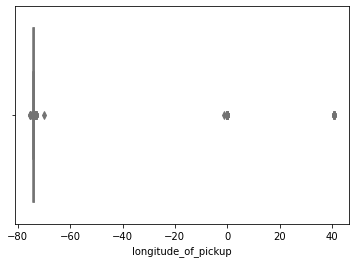

FEATURE: latitude_of_pickup


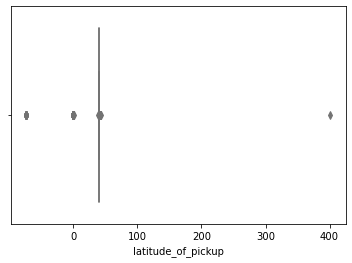

FEATURE: longitude_of_dropoff


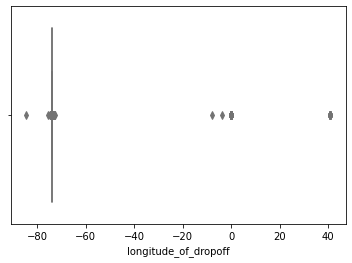

FEATURE: latitude_of_dropoff


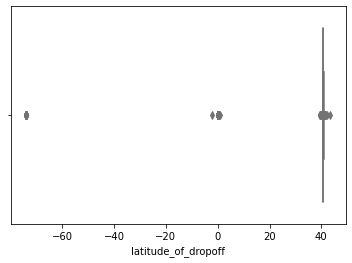

FEATURE: no_of_passenger


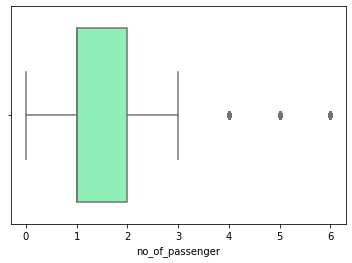

FEATURE: hour


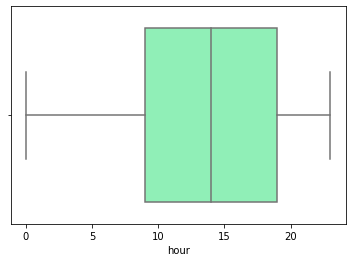

FEATURE: day


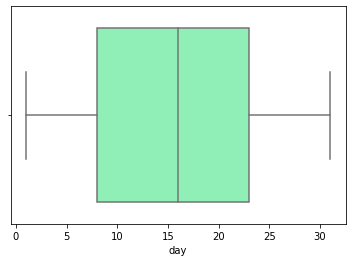

FEATURE: month


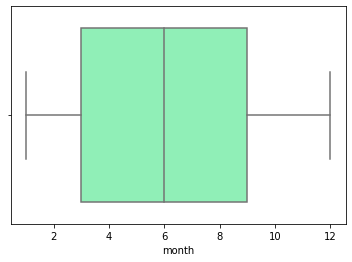

FEATURE: year


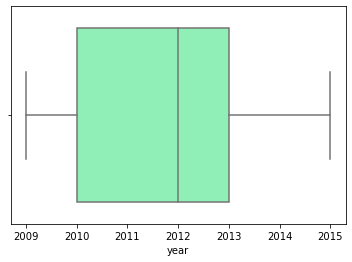

FEATURE: dayofweek


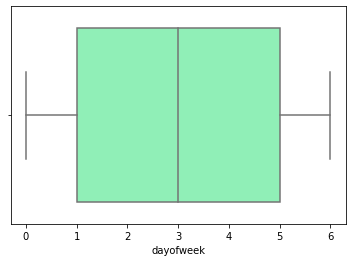

FEATURE: distance_travelled


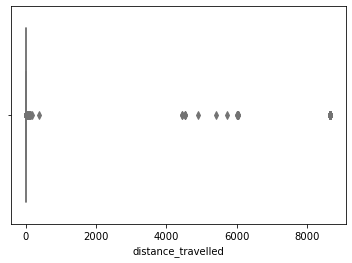

In [41]:
# looking for outliers 
for i in df.iloc[:,3:].columns:
    sns.boxplot(x = df[i] , data = df , palette = 'rainbow')
    print('FEATURE:',i)
    
    plt.show()

In [42]:
v = [7]
def Outlier(data):
    for column in data.iloc[:,v].columns:
        if data[column].dtype!='str':
            Q1=np.percentile(data[column],25)
            Q3=np.percentile(data[column],75)
            IQR= Q3-Q1
            lower=Q1-(1.5* IQR)
            upper=Q3+(1.5* IQR)
            data.loc[:,column] =np.where(data[column].values>upper,upper,data[column].values)
            data.loc[:,column] =np.where(data[column].values<lower,lower,data[column].values)
    return data
 
df2=Outlier(df)
df.columns
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,distance_travelled
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,17,15,6,2009,0,1.030764
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,16,5,1,2010,1,8.450134
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,0,18,8,2011,3,1.389525
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,4,21,4,2012,5,2.799270
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,7,9,3,2010,1,1.999157


In [43]:
df.iloc[:,7].unique() # to see that now outliers in passengers column has been treated .

array([1. , 2. , 3. , 3.5, 0. ])

FEATURE: longitude_of_pickup


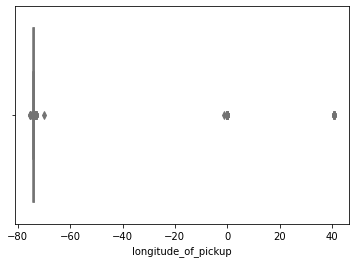

FEATURE: latitude_of_pickup


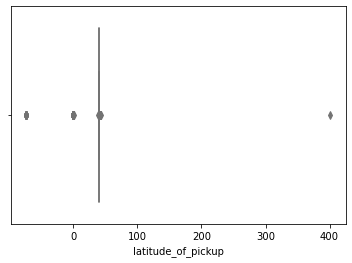

FEATURE: longitude_of_dropoff


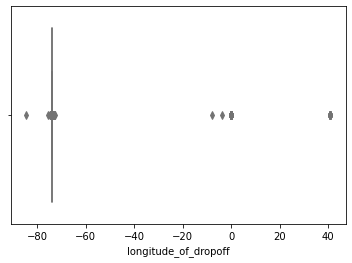

FEATURE: latitude_of_dropoff


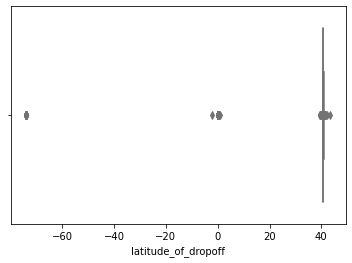

FEATURE: no_of_passenger


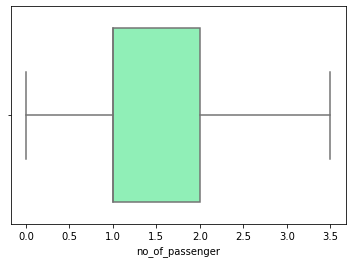

FEATURE: hour


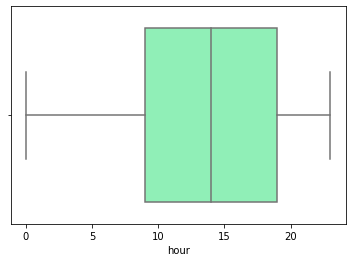

FEATURE: day


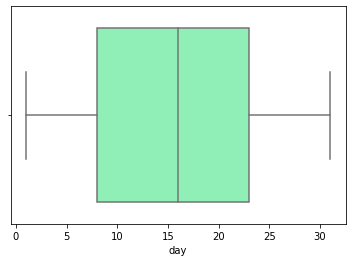

FEATURE: month


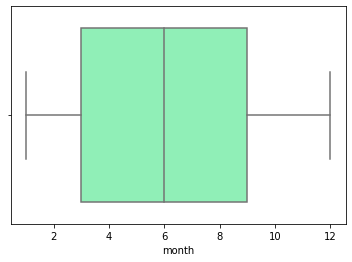

FEATURE: year


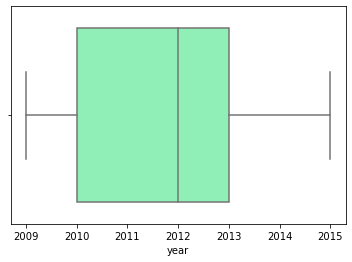

FEATURE: dayofweek


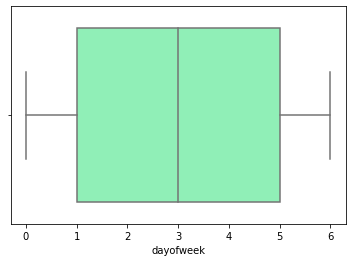

FEATURE: distance_travelled


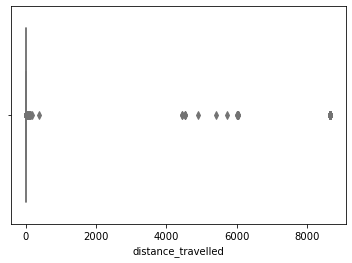

In [44]:
for i in df2.iloc[:,3:].columns:
    sns.boxplot(x = df2[i] , data = df , palette = 'rainbow')
    print('FEATURE:',i)
    
    plt.show()

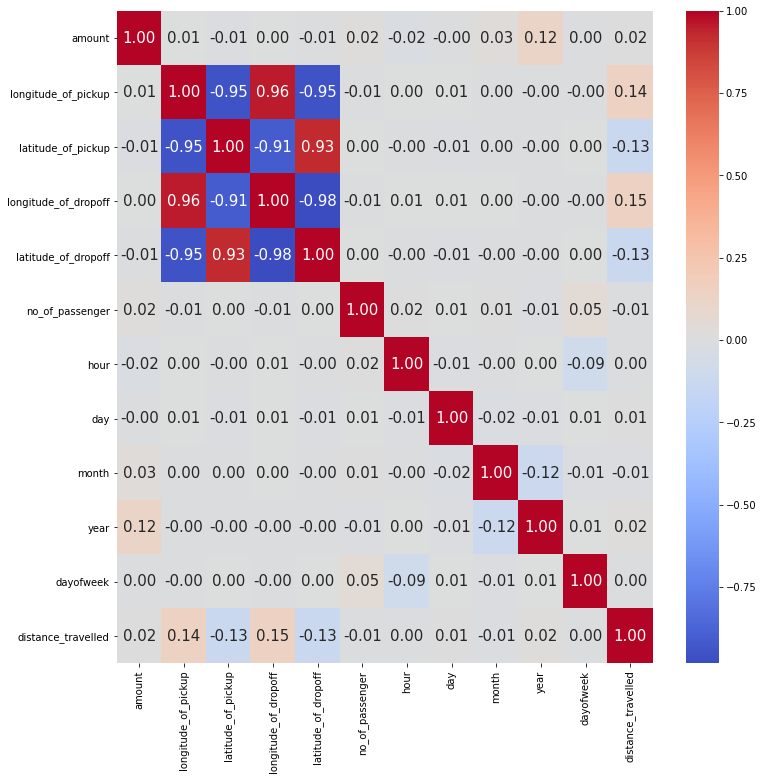

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,distance_travelled
amount,1.000000,0.005944,-0.007338,0.004286,-0.005442,0.017816,-0.022018,-0.001460,0.026876,0.120831,0.000520,0.015667
longitude_of_pickup,0.005944,1.000000,-0.950588,0.956131,-0.946968,-0.006291,0.004910,0.006001,0.000416,-0.001284,-0.003227,0.142805
latitude_of_pickup,-0.007338,-0.950588,1.000000,-0.911123,0.928189,0.004232,-0.004606,-0.006657,0.000711,-0.001334,0.003014,-0.125606
longitude_of_dropoff,0.004286,0.956131,-0.911123,1.000000,-0.982117,-0.006122,0.005490,0.005135,0.001407,-0.000250,-0.002228,0.145640
latitude_of_dropoff,-0.005442,-0.946968,0.928189,-0.982117,1.000000,0.004440,-0.004515,-0.007928,-0.000422,-0.001888,0.001424,-0.127274
no_of_passenger,0.017816,-0.006291,0.004232,-0.006122,0.004440,1.000000,0.015793,0.007512,0.011898,-0.009199,0.052367,-0.006205
hour,-0.022018,0.004910,-0.004606,0.005490,-0.004515,0.015793,1.000000,-0.008261,-0.001950,0.004104,-0.091310,0.000601
day,-0.001460,0.006001,-0.006657,0.005135,-0.007928,0.007512,-0.008261,1.000000,-0.017241,-0.011144,0.008500,0.010284
month,0.026876,0.000416,0.000711,0.001407,-0.000422,0.011898,-0.001950,-0.017241,1.000000,-0.115742,-0.009927,-0.008914
year,0.120831,-0.001284,-0.001334,-0.000250,-0.001888,-0.009199,0.004104,-0.011144,-0.115742,1.000000,0.006907,0.022322


In [45]:
corr = df2.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'coolwarm')
plt.show()
display(corr)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
#  Selecting required features and respective target .
x = df2.drop(['amount','unique_id','date_time_of_pickup'],axis=1)
y=df2['amount']

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
display('TRAINING_DATA',x_train.head(),y_train.head(),'TESTING_DATA',x_test.head(),y_test.head())

# displaying heading rows of both data

'TRAINING_DATA'

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,distance_travelled
39087,-73.974332,40.791427,-73.979032,40.766365,3.5,17,27,7,2013,5,2.814726
30893,-73.973657,40.751632,-73.969945,40.756702,3.5,9,8,1,2013,1,0.644659
45278,-73.975263,40.752280,-73.995098,40.737500,3.5,16,17,3,2012,5,2.343742
16398,-73.983034,40.766784,-73.971944,40.789289,1.0,9,8,6,2012,4,2.670991
13653,-73.986717,40.771648,-73.982140,40.770699,1.0,17,22,6,2015,0,0.399692


39087    10.0
30893     4.0
45278     6.9
16398     7.7
13653     4.5
Name: amount, dtype: float64

'TESTING_DATA'

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,hour,day,month,year,dayofweek,distance_travelled
33553,-73.980883,40.759608,-73.957732,40.782482,1.0,6,22,9,2011,3,3.204691
9427,-73.972360,40.762984,-73.866963,40.767363,2.0,22,23,3,2011,2,8.889686
199,-73.989692,40.735497,-73.982012,40.739392,1.0,21,5,1,2013,5,0.778635
12447,-73.973510,40.748522,-73.988325,40.750062,2.0,12,10,12,2012,0,1.259684
39489,-73.972496,40.759434,-73.980302,40.745949,1.0,21,27,4,2009,0,1.637296


33553     7.3
9427     33.3
199       5.5
12447     7.0
39489     5.3
Name: amount, dtype: float64

## DECISION TREE REGRESSOR 

In [50]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
reg = DecisionTreeRegressor()
reg

DecisionTreeRegressor()

In [52]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler 

sc = StandardScaler()

min_max = MinMaxScaler()

x_train_scaled = min_max.fit_transform(x_train)

x_test_scaled = min_max.fit_transform(x_test) 



# MINMAXSCALER -----> MinMaxScaler For each value in a feature, MinMaxScaler subtracts the minimum value in the feature 
# and then divides by the range. The range is the difference between the original maximum and original minimum. 
# MinMaxScaler( preserves the shape of the original distribution).

In [53]:
# reg.fit(x_train_scaled,y_train)

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
# parameters={"max_depth" : [1,3,5,7,9,11,12],
#            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]}

In [56]:
parameters={"max_depth" : [3,5,12],
           "min_samples_leaf":[5,6,10],
           "max_leaf_nodes":[None,40,50]}

In [58]:
tuning_model=GridSearchCV(reg,param_grid=parameters,cv=5)

#  by default cross validation returns negated mse value .

In [59]:
tuning_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 5, 12],
                         'max_leaf_nodes': [None, 40, 50],
                         'min_samples_leaf': [5, 6, 10]})

In [60]:
print(tuning_model.best_score_)

0.7536418204015076


In [61]:
print(tuning_model.best_params_)

{'max_depth': 12, 'max_leaf_nodes': 50, 'min_samples_leaf': 10}


In [62]:
reg2 = DecisionTreeRegressor(max_depth = 12,min_samples_leaf = 10,max_leaf_nodes=None)

In [63]:
reg2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=10)

In [64]:
dt_predicted_reg2 = reg2.predict(x_test)
dt_predicted_reg2

array([ 7.9       , 19.64277778,  4.64418811, ...,  8.75271318,
       28.03636364,  7.28206522])

In [65]:
mega2 = pd.DataFrame({'dt_predicted_reg2':dt_predicted_reg2, 'actual':y_test})
mega2.sample(10)

,dt_predicted_reg2,actual
14957,5.380952,5.00
40815,7.235104,5.30
13835,4.362267,3.30
41704,11.909091,16.00
24492,14.554057,14.00
16930,7.341935,7.50
26733,37.149062,49.04
11836,11.989069,9.30
39635,14.719783,8.10
4829,8.728571,9.30


In [70]:
from sklearn.metrics import mean_squared_error ,mean_absolute_error , r2_score

In [71]:
mse = mean_squared_error

In [72]:
mse(dt_predicted_reg2,y_test)

27.089064247547032

In [73]:
mse(dt_predicted,y_test)

40.66037494

In [74]:
r2_score(dt_predicted_reg2,y_test)

0.6472404348100274

##  KNN

In [100]:
df2.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger', 'hour', 'day', 'month', 'year', 'dayofweek',
       'distance_travelled'],
      dtype='object')

In [101]:
#  Selecting required features and respective target .
x2 = df2.drop(['amount','unique_id','date_time_of_pickup', 'longitude_of_pickup',
               'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff'],axis=1)
y2 =df2['amount']

In [102]:
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state= 123)

In [103]:
display('TRAINING_DATA',x2_train.head(),y2_train.head(),'TESTING_DATA',x2_test.head(),y2_test.head())

# displaying heading rows of both data

'TRAINING_DATA'

,no_of_passenger,hour,day,month,year,dayofweek,distance_travelled
2660,2.0,1,12,6,2009,4,1.594001
32815,1.0,6,20,11,2013,2,2.172243
35141,1.0,15,26,2,2015,3,1.766918
19390,2.0,11,3,3,2009,1,2.632699
34846,1.0,6,26,1,2012,3,0.913893


2660     6.5
32815    8.5
35141    8.5
19390    8.9
34846    4.9
Name: amount, dtype: float64

'TESTING_DATA'

,no_of_passenger,hour,day,month,year,dayofweek,distance_travelled
11872,1.0,17,13,12,2011,1,2.655564
40828,1.0,8,4,12,2009,4,4.650931
36400,1.0,19,4,3,2014,1,1.443825
5166,1.0,14,18,10,2009,6,0.868890
30273,3.5,18,30,1,2015,4,6.849778


11872    10.5
40828     9.3
36400     6.0
5166      4.5
30273    24.0
Name: amount, dtype: float64

In [104]:
from sklearn.neighbors import KNeighborsRegressor

Minimum error:- 0.936 at K = 0


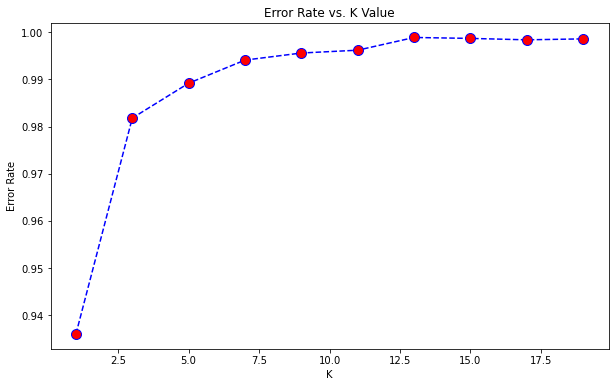

In [105]:
error_rate = []
for i in range(1,20,2):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x2_train,y2_train)
    pred_i = knn.predict(x2_test)
    error_rate.append(np.mean(pred_i != y2_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20,2),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [123]:
# x2_train_scaled = min_max.fit_transform(x2_train)
# x2_test_scaled = min_max.fit_transform(x2_test)

In [122]:
#np.negative(x2_train_scaled) # to see the negative values 

In [143]:
kreg = KNeighborsRegressor(n_neighbors=3)

In [144]:
kreg.fit(x2_train,y2_train)

KNeighborsRegressor(n_neighbors=3)

In [145]:
kpredicted = kreg.predict(x2_test)
kpredicted

array([13.43333333, 11.3       ,  6.33333333, ..., 16.        ,
        8.76666667, 11.33333333])

In [146]:
knn = pd.DataFrame({'pred':kpredicted , 'actual':y2_test})
knn.head()

,pred,actual
11872,13.433333,10.5
40828,11.300000,9.3
36400,6.333333,6.0
5166,7.566667,4.5
30273,21.833333,24.0


In [147]:
r2_score(kpredicted,y2_test)

0.6371871157492136